In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.1%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Trip Departure Hour

In [4]:
df = load_data('trip_purpose_mode')
_df = df.pivot_table(index='deptm_hr', columns='source', aggfunc='sum', values='trexpfac')

<AxesSubplot:xlabel='deptm_hr'>

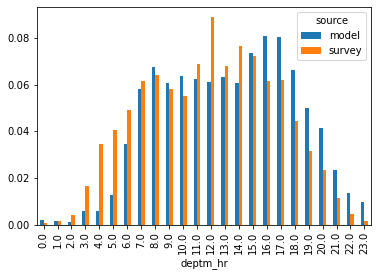

In [5]:
_df = _df/_df.sum()
_df.plot(kind='bar')

## By Counties

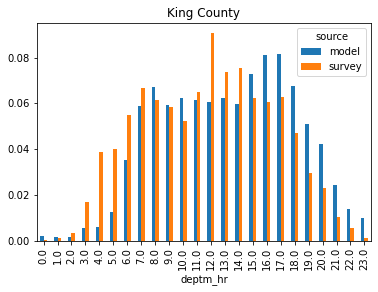

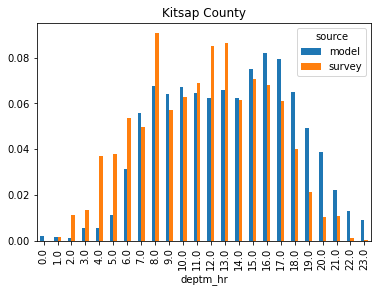

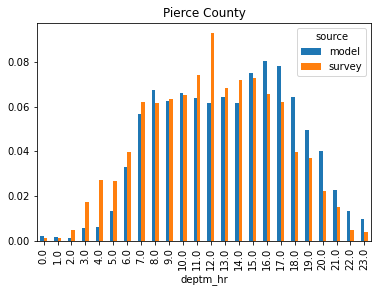

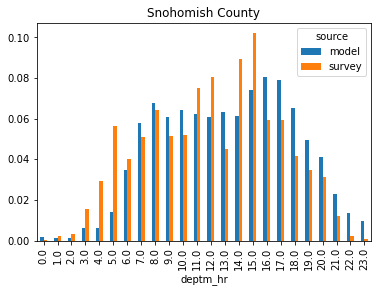

In [6]:
_df = df.rename(columns={'person_county':'County'}).pivot_table(index=['County', 'deptm_hr'], columns='source', aggfunc='sum', values='trexpfac')
for county, df_county in _df.reset_index(level='County').groupby('County'):
    _df = df_county.drop('County', axis=1)
    _df = _df/_df.sum()
    _df.plot(kind='bar', title=county+' County')

# Tour Origin Departure Hour

In [7]:
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='tlvorg_hr', columns='source', aggfunc='sum', values='toexpfac')
_df

source,model,survey
tlvorg_hr,,
0,"4,336","6,725"
1,"2,789","15,677"
2,"1,156","55,540"
3,"80,508","221,312"
4,"68,403","399,436"
5,"164,356","451,156"
6,"444,030","643,285"
7,"712,079","811,628"
8,"753,839","690,156"


<AxesSubplot:xlabel='tlvorg_hr'>

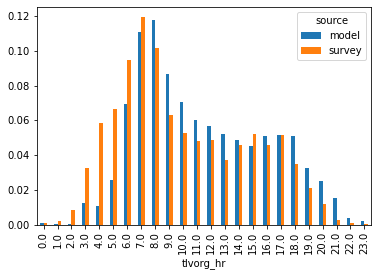

In [8]:
_df = _df/_df.sum()
_df.plot(kind='bar')

## By Counties

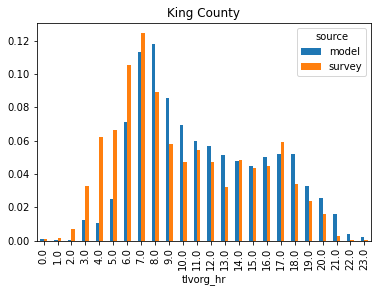

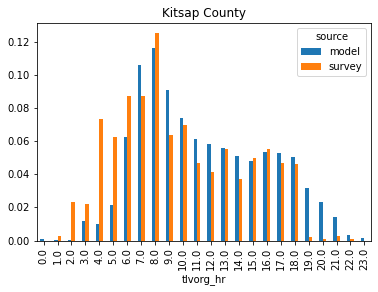

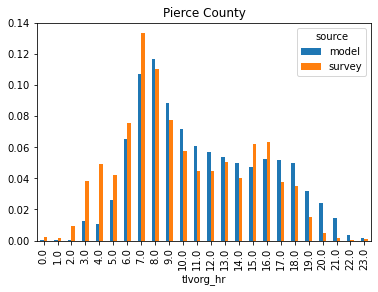

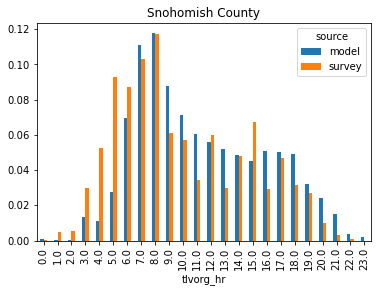

In [9]:
_df = df.rename(columns={'person_county':'County'}).pivot_table(index=['County', 'tlvorg_hr'], columns='source', aggfunc='sum', values='toexpfac')
for county, df_county in _df.reset_index(level='County').groupby('County'):
    _df = df_county.drop('County', axis=1)
    _df = _df/_df.sum()
    _df.plot(kind='bar', title=county+' County')

In [10]:
_df = df.pivot_table(index='tlvorg_hr', columns='source', aggfunc='sum', values='toexpfac')
_df.sum()

source
model    6,417,010
survey   6,807,631
dtype: float64

In [11]:
_df = df.rename(columns={'person_county':'County'}).pivot_table(index=['County', 'tlvorg_hr'], columns='source', aggfunc='sum', values='toexpfac')
_df.groupby('County').sum()

source,model,survey
County,,
King,"3,526,958","3,663,281"
Kitsap,"391,259","502,309"
Pierce,"1,266,129","1,334,376"
Snohomish,"1,232,664","1,307,664"
